In [1]:
#Import the dependencies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes in a list.
coordinates = list(lat_lngs)

In [4]:
# import the citipy module.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities=[]
#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)


618

In [6]:
# Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

In [23]:
# Starting URL for weather map API call.
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
#Import the datetime module from the datetime library.
from datetime import datetime


In [29]:
#Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if(i % 50 ==0 and i>=50):
        set_count += 1
        record_count = 1
        
    #Create endpoint url for each city.
    city_url = url + "&q=" + city
        
    #log the url,record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
        
    #Add 1 to the record count.
    record_count += 1
        
    #Run an API request for each of the cities.
    try:
         #Parse the JSON and retrieve the data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
            
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            
        #Append the city information into city_data list.
        city_data.append({"City": city.title(),
                             "Lat": city_lat,
                             "Lng": city_lng,
                             "Max Temp": city_max_temp,
                             "Humidity": city_humidity,
                             "Cloudiness": city_clouds,
                             "Wind Speed": city_wind,
                             "Country": city_country,
                             "Date": city_date})
    #If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
#Indicate the data loading is complete.
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")       
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adrar
Processing Record 2 of Set 1 | tuatapere
Processing Record 3 of Set 1 | dingle
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | nautla
Processing Record 6 of Set 1 | nikolskoye
Processing Record 7 of Set 1 | bathsheba
Processing Record 8 of Set 1 | namatanai
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | braslav
City not found. Skipping...
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | tete
Processing Record 13 of Set 1 | atasu
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | umm kaddadah
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | ostrovnoy
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | suntar
Processing Record 20 of Set 1 | bambanglipuro
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | belushya guba
City not foun

Processing Record 38 of Set 4 | elko
Processing Record 39 of Set 4 | namibe
Processing Record 40 of Set 4 | paka
Processing Record 41 of Set 4 | nouadhibou
Processing Record 42 of Set 4 | havre-saint-pierre
Processing Record 43 of Set 4 | bambous virieux
Processing Record 44 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 45 of Set 4 | abalak
Processing Record 46 of Set 4 | palmas
Processing Record 47 of Set 4 | kenora
Processing Record 48 of Set 4 | mehamn
Processing Record 49 of Set 4 | awjilah
Processing Record 50 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 1 of Set 5 | butaritari
Processing Record 2 of Set 5 | mbour
Processing Record 3 of Set 5 | saint george
Processing Record 4 of Set 5 | lagoa
Processing Record 5 of Set 5 | turukhansk
Processing Record 6 of Set 5 | barranco
Processing Record 7 of Set 5 | bengkulu
Processing Record 8 of Set 5 | praia da vitoria
Processing Record 9 of Set 5 | anloga
Processing Record 10 of Set 5 | hithadh

Processing Record 28 of Set 8 | sao joao da barra
Processing Record 29 of Set 8 | slonim
Processing Record 30 of Set 8 | manyoni
Processing Record 31 of Set 8 | magistralnyy
Processing Record 32 of Set 8 | sola
Processing Record 33 of Set 8 | bom jesus
Processing Record 34 of Set 8 | mawlaik
Processing Record 35 of Set 8 | mayor pablo lagerenza
Processing Record 36 of Set 8 | jabiru
City not found. Skipping...
Processing Record 37 of Set 8 | zhanatas
City not found. Skipping...
Processing Record 38 of Set 8 | novobirilyussy
Processing Record 39 of Set 8 | santa marta
Processing Record 40 of Set 8 | plettenberg bay
Processing Record 41 of Set 8 | matagami
Processing Record 42 of Set 8 | cumra
Processing Record 43 of Set 8 | okhotsk
Processing Record 44 of Set 8 | simao
Processing Record 45 of Set 8 | auchterarder
Processing Record 46 of Set 8 | bukama
Processing Record 47 of Set 8 | bazarnyy karabulak
Processing Record 48 of Set 8 | marcona
City not found. Skipping...
Processing Record 

Processing Record 15 of Set 12 | kostomuksha
Processing Record 16 of Set 12 | san jeronimo
Processing Record 17 of Set 12 | lavrentiya
Processing Record 18 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 19 of Set 12 | rijeka
Processing Record 20 of Set 12 | san ramon de la nueva oran
Processing Record 21 of Set 12 | phulabani
Processing Record 22 of Set 12 | karaidel
Processing Record 23 of Set 12 | goiania
Processing Record 24 of Set 12 | pedroso
Processing Record 25 of Set 12 | pitimbu
Processing Record 26 of Set 12 | la maddalena
Processing Record 27 of Set 12 | verkhnetulomskiy
Processing Record 28 of Set 12 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 29 of Set 12 | xiangxiang
Processing Record 30 of Set 12 | iqaluit
Processing Record 31 of Set 12 | acarau
Processing Record 32 of Set 12 | biggar
Processing Record 33 of Set 12 | watertown
Processing Record 34 of Set 12 | laje
Processing Record 35 of Set 12 | tezu
Processing Record 36 of S

In [30]:
len(city_data)

568

In [31]:
#Convert the array of dictionaries to a panda dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Adrar,20.50,-10.07,75.96,10,0,11.21,MR,2020-02-20 21:34:29
1,Tuatapere,-46.13,167.68,61.77,94,76,2.28,NZ,2020-02-20 21:34:29
2,Dingle,11.00,122.67,71.35,93,69,13.80,PH,2020-02-20 21:34:29
3,Ribeira Grande,38.52,-28.70,57.20,62,40,6.93,PT,2020-02-20 21:34:30
4,Nautla,20.22,-96.78,79.81,69,27,6.24,MX,2020-02-20 21:34:30
5,Nikolskoye,59.70,30.79,33.01,95,75,4.47,RU,2020-02-20 21:34:30
6,Bathsheba,13.22,-59.52,80.60,61,20,19.46,BB,2020-02-20 21:34:30
7,Namatanai,-3.67,152.43,82.36,77,45,14.70,PG,2020-02-20 21:34:30
8,Ushuaia,-54.80,-68.30,53.60,62,90,14.99,AR,2020-02-20 21:31:14
9,Vaini,-21.20,-175.20,80.60,69,20,5.82,TO,2020-02-20 21:34:31


In [32]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Adrar,MR,2020-02-20 21:34:29,20.50,-10.07,75.96,10,0,11.21
1,Tuatapere,NZ,2020-02-20 21:34:29,-46.13,167.68,61.77,94,76,2.28
2,Dingle,PH,2020-02-20 21:34:29,11.00,122.67,71.35,93,69,13.80
3,Ribeira Grande,PT,2020-02-20 21:34:30,38.52,-28.70,57.20,62,40,6.93
4,Nautla,MX,2020-02-20 21:34:30,20.22,-96.78,79.81,69,27,6.24
5,Nikolskoye,RU,2020-02-20 21:34:30,59.70,30.79,33.01,95,75,4.47
6,Bathsheba,BB,2020-02-20 21:34:30,13.22,-59.52,80.60,61,20,19.46
7,Namatanai,PG,2020-02-20 21:34:30,-3.67,152.43,82.36,77,45,14.70
8,Ushuaia,AR,2020-02-20 21:31:14,-54.80,-68.30,53.60,62,90,14.99
9,Vaini,TO,2020-02-20 21:34:31,-21.20,-175.20,80.60,69,20,5.82


In [37]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

#Export the city_data into a csv.
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [38]:
#Extract relevant fields from the dataframe for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [39]:
#Import the time module.
import time

# Get today's date.
today = time.strftime("%x")
today

'02/20/20'

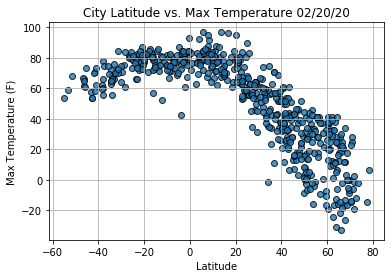

In [44]:
#Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title("City Latitude vs. Max Temperature " + time.strftime("%x") )
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show plot.
plt.show()

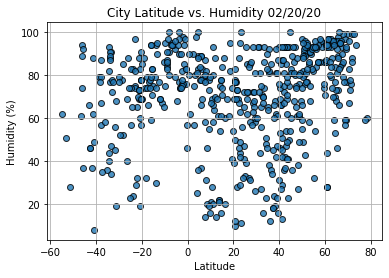

In [45]:
#Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title("City Latitude vs. Humidity " + time.strftime("%x") )
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plot.
plt.show()

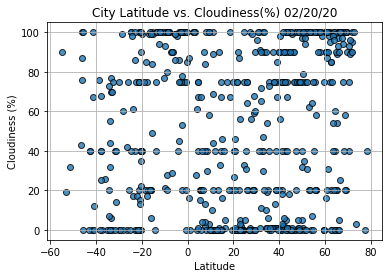

In [47]:
#Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title("City Latitude vs. Cloudiness(%) " + time.strftime("%x") )
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show plot.
plt.show()

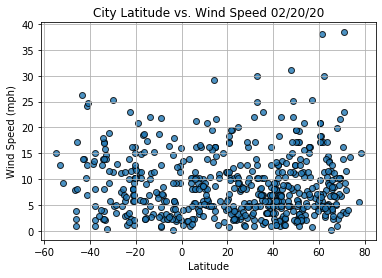

In [48]:
#Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title("City Latitude vs. Wind Speed " + time.strftime("%x") )
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show plot.
plt.show()